# Final Project

## 1. Scope the Project

Our plan is to use a supervised learning technique to predict which customers are most likely to cancel their subscription using **the past three months of customer data which includes subscription and listening history**.

## 2. Gather Data

Read the following files into Python:
* Customer data: *maven_music_customers.csv*
* Listing history: *maven_music_listening_history.xlsx*

In [2]:
import pandas as pd

In [3]:
# Read in the customer data
customer = pd.read_csv('../../Data/maven_music_customers.csv')
customer.head(2)

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
0,5001,Harmony Greene,Email: harmonious.vibes@email.com,3/13/23,Basic (Ads),$2.99,NaN,NaN
1,5002,Aria Keys,Email: melodious.aria@email.edu,3/13/23,NaN,$2.99,NaN,NaN


In [4]:
listening_data = pd.read_excel('../../Data/maven_music_listening_history.xlsx')
listening_data.tail(2)

,Customer ID,Session ID,Audio Order,Audio ID,Audio Type
503,5763,111333,2,108,Song
504,5763,111333,3,110,Song


In [6]:
# Read in the audio data
audio = pd.read_excel('../../Data/maven_music_listening_history.xlsx', sheet_name=1)
audio.head(2)

,ID,Name,Genre,Popularity
0,Song-101,Dance All Night,Pop,1
1,Song-102,Unbreakable Beat,Pop,2


In [7]:
# Read in the session data
session = pd.read_excel('../../Data/maven_music_listening_history.xlsx', sheet_name=2)
session.head(2)

,Session ID,Session Log In Time
0,100520,2023-03-13 18:29:00
1,100522,2023-03-13 22:15:00


## 3. Clean Data

### a. Convert Data Types

Check the data types of the data in the tables and convert to numeric and datetime values as necessary.

In [8]:
# Check the data types


In [9]:
customer.dtypes

Customer ID           int64
Customer Name        object
Email                object
Member Since         object
Subscription Plan    object
Subscription Rate    object
Discount?            object
Cancellation Date    object
dtype: object

In [10]:
audio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          17 non-null     object
 1   Name        17 non-null     object
 2   Genre       17 non-null     object
 3   Popularity  17 non-null     int64 
dtypes: int64(1), object(3)
memory usage: 672.0+ bytes


In [11]:
customer.head()

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
0,5001,Harmony Greene,Email: harmonious.vibes@email.com,3/13/23,Basic (Ads),$2.99,NaN,NaN
1,5002,Aria Keys,Email: melodious.aria@email.edu,3/13/23,NaN,$2.99,NaN,NaN
2,5004,Lyric Bell,Email: rhythmical.lyric@email.com,3/13/23,NaN,$2.99,NaN,6/1/23
3,5267,Rock Bassett,Email: groovy.rock@email.com,3/20/23,Basic (Ads),$2.99,NaN,NaN
4,5338,Rhythm Dixon,Email: beats.by.rhythm@email.edu,3/20/23,NaN,$2.99,NaN,NaN


In [12]:
# Convert objects to numeric and datetime fields
customer['Member Since'] = pd.to_datetime(customer['Member Since'])

In [13]:
customer['Cancellation Date'] = pd.to_datetime(customer['Cancellation Date'])

In [14]:
customer['Subscription Rate'] = pd.to_numeric(customer['Subscription Rate'].str.replace('$', ''))

C:\Users\tanis\AppData\Local\Temp\ipykernel_10000\989149012.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  customer['Subscription Rate'] = pd.to_numeric(customer['Subscription Rate'].str.replace('$', ''))


In [15]:
audio

,ID,Name,Genre,Popularity
0,Song-101,Dance All Night,Pop,1
1,Song-102,Unbreakable Beat,Pop,2
2,Song-103,Sunset Boulevard,Pop Music,5
3,Song-104,Glowing Hearts,Pop Music,10
4,Song-105,Pop Rocks,Pop Music,52
5,Song-106,My Old Dog and My True Love,Country,23
6,Song-107,Dirt Road Romance,Country,30
7,Song-108,Chase the Dream,Hip Hop,4
8,Song-109,Rise Above,Hip Hop,9
9,Song-110,Boss Moves,Hip Hop,28


In [16]:
audio[['Audio Type', 'ID']] = pd.DataFrame(audio['ID'].str.split('-').to_list())

In [17]:
customer


,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
0,5001,Harmony Greene,Email: harmonious.vibes@email.com,2023-03-13,Basic (Ads),2.99,NaN,NaT
1,5002,Aria Keys,Email: melodious.aria@email.edu,2023-03-13,NaN,2.99,NaN,NaT
2,5004,Lyric Bell,Email: rhythmical.lyric@email.com,2023-03-13,NaN,2.99,NaN,2023-06-01
3,5267,Rock Bassett,Email: groovy.rock@email.com,2023-03-20,Basic (Ads),2.99,NaN,NaT
4,5338,Rhythm Dixon,Email: beats.by.rhythm@email.edu,2023-03-20,NaN,2.99,NaN,NaT
5,5404,Jazz Saxton,Email: jazzy.sax@email.com,2023-03-20,NaN,2.99,NaN,2023-06-03
6,5581,Reed Sharp,Email: sharp.tunes@email.com,2023-03-21,Premium (No Ads),9.99,NaN,NaT
7,5759,Carol Kingbird,Email: songbird.carol@email.com,2023-03-22,Premium (No Ads),9.99,NaN,2023-06-02
8,5761,Sonata Nash,Email: musical.sonata@email.com,2023-03-28,Premium (No Ads),9.99,NaN,NaT
9,5763,Jazz Coleman,Email: coleman.jazzmaster@email.com,2023-03-28,Basic (Ads),2.99,NaN,NaT


### b. Resolve Data Issues

Check for missing data, inconsistent text and typos, duplicate data and outliers.

#### i. Missing Data

In [18]:
# Look for NaN values in the data
customer['Cancellation Date'].value_counts(dropna=False)

NaT           17
2023-06-01     6
2023-06-02     5
2023-06-03     2
Name: Cancellation Date, dtype: int64

In [19]:
import numpy as np

In [20]:
customer['Subscription Plan'] = np.where(customer['Subscription Rate'] == 2.99, 'Basic (Ads)', 'Premium (No Ads)')

In [21]:
customer['Discount?'] = np.where(customer['Discount?'].isna(), 0, 1)

#### ii. Inconsistent Text & Typos

In [22]:
# Look for inconsistent text & typos
customer.describe()

,Customer ID,Subscription Rate,Discount?
count,30.000000,30.000000,30.000000
mean,6276.333333,8.556667,0.233333
std,814.255587,17.517840,0.430183
min,5001.000000,2.990000,0.000000
25%,5759.500000,2.990000,0.000000
50%,6196.000000,2.990000,0.000000
75%,6823.500000,7.990000,0.000000
max,7583.000000,99.990000,1.000000


In [23]:
customer.loc[15, 'Subscription Rate'] = 9.99

In [24]:
audio.head()

,ID,Name,Genre,Popularity,Audio Type
0,101,Dance All Night,Pop,1,Song
1,102,Unbreakable Beat,Pop,2,Song
2,103,Sunset Boulevard,Pop Music,5,Song
3,104,Glowing Hearts,Pop Music,10,Song
4,105,Pop Rocks,Pop Music,52,Song


In [25]:
audio.Genre.value_counts()

Pop Music     3
Hip Hop       3
Comedy        3
Pop           2
Country       2
Jazz          2
True Crime    2
Name: Genre, dtype: int64

In [26]:
audio['Genre'] = np.where(audio['Genre'] == 'Pop Music', 'Pop', audio['Genre'])

#### iii. Duplicate Rows

In [27]:
# Look for duplicate rows


In [28]:
# No Duplicate rows found

#### iv. Outliers

In [29]:
# Look for outliers


In [30]:
customer.describe()

,Customer ID,Subscription Rate,Discount?
count,30.000000,30.000000,30.000000
mean,6276.333333,5.556667,0.233333
std,814.255587,3.058998,0.430183
min,5001.000000,2.990000,0.000000
25%,5759.500000,2.990000,0.000000
50%,6196.000000,2.990000,0.000000
75%,6823.500000,7.990000,0.000000
max,7583.000000,9.990000,1.000000


In [31]:
session.describe()

,Session ID
count,90.000000
mean,105619.788889
std,3616.208569
min,100520.000000
25%,102149.000000
50%,105390.500000
75%,109658.250000
max,111333.000000


In [32]:
audio.describe()

,Popularity
count,17.000000
mean,21.058824
std,23.381271
min,1.000000
25%,4.000000
50%,10.000000
75%,28.000000
max,80.000000


In [33]:
listening_data.describe()

,Customer ID,Session ID,Audio Order,Audio ID
count,505.000000,505.000000,505.000000,505.000000
mean,6112.247525,105225.554455,4.138614,112.063366
std,832.861221,3625.879577,2.669008,24.670285
min,5001.000000,100520.000000,1.000000,101.000000
25%,5267.000000,101925.000000,2.000000,103.000000
50%,6029.000000,105116.000000,4.000000,105.000000
75%,6822.000000,109654.000000,6.000000,109.000000
max,7583.000000,111333.000000,15.000000,205.000000


### c. Create New Columns

Create two new columns that will be useful for EDA and modeling:
* Cancelled: whether a customer cancelled or not
* Email: Remove the "Email:" from the email addresses

In [34]:
# Create a 'Cancelled' column
customer['Cancelled'] = np.where(customer['Cancellation Date'].isna(), 0, 1)

In [35]:
# Create an updated 'Email' column without the Email: portion
customer['Email'] = customer['Email'].str.lstrip('Email: ')

In [36]:
customer.head()

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date,Cancelled
0,5001,Harmony Greene,harmonious.vibes@email.com,2023-03-13,Basic (Ads),2.99,0,NaT,0
1,5002,Aria Keys,elodious.aria@email.edu,2023-03-13,Basic (Ads),2.99,0,NaT,0
2,5004,Lyric Bell,rhythmical.lyric@email.com,2023-03-13,Basic (Ads),2.99,0,2023-06-01,1
3,5267,Rock Bassett,groovy.rock@email.com,2023-03-20,Basic (Ads),2.99,0,NaT,0
4,5338,Rhythm Dixon,beats.by.rhythm@email.edu,2023-03-20,Basic (Ads),2.99,0,NaT,0


## 4. EDA

Try to better understand the customers who cancelled:
* How long were they members before they cancelled?
* What percentage of customers who cancelled had a discount vs customers who didn't cancel?

In [51]:
# How long were customers members before they cancelled?
(customer['Cancellation Date'] - customer['Member Since']).mean()

Timedelta('46 days 07:23:04.615384615')

In [52]:
# Cancellation rate for those who had a discount
discount_yes = customer[customer['Discount?']== 1]
discount_yes

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date,Cancelled
21,6822,Kiki Keys,kiki.keys.piano@email.com,2023-05-01,Premium (No Ads),7.99,1,NaT,0
22,6824,Greta Groove,groovy.greta@email.com,2023-05-01,Premium (No Ads),7.99,1,2023-06-02,1
23,7087,Harmony Heart,heartfelt.harmony@email.com,2023-05-01,Premium (No Ads),7.99,1,2023-06-02,1
25,7224,Melody Fitzgerald,fitzgerald.melody@email.com,2023-05-08,Premium (No Ads),7.99,1,2023-06-01,1
26,7401,Reed Murphy,urphy.reed.music@email.com,2023-05-08,Premium (No Ads),7.99,1,2023-06-01,1
28,7581,Lyric Keys,keysoflyric@email.com,2023-05-16,Premium (No Ads),7.99,1,2023-06-03,1
29,7583,Melody Singer,elodic.singer@email.com,2023-05-16,Premium (No Ads),7.99,1,2023-06-01,1


In [53]:
discount_yes['Cancelled'].sum()/discount_yes['Cancelled'].count()

0.8571428571428571

In [54]:
# Cancellation rate for those who did not have a discount
discount_no = customer[customer['Discount?']== 0]
discount_no


,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date,Cancelled
0,5001,Harmony Greene,harmonious.vibes@email.com,2023-03-13,Basic (Ads),2.99,0,NaT,0
1,5002,Aria Keys,elodious.aria@email.edu,2023-03-13,Basic (Ads),2.99,0,NaT,0
2,5004,Lyric Bell,rhythmical.lyric@email.com,2023-03-13,Basic (Ads),2.99,0,2023-06-01,1
3,5267,Rock Bassett,groovy.rock@email.com,2023-03-20,Basic (Ads),2.99,0,NaT,0
4,5338,Rhythm Dixon,beats.by.rhythm@email.edu,2023-03-20,Basic (Ads),2.99,0,NaT,0
5,5404,Jazz Saxton,jazzy.sax@email.com,2023-03-20,Basic (Ads),2.99,0,2023-06-03,1
6,5581,Reed Sharp,sharp.tunes@email.com,2023-03-21,Premium (No Ads),9.99,0,NaT,0
7,5759,Carol Kingbird,songbird.carol@email.com,2023-03-22,Premium (No Ads),9.99,0,2023-06-02,1
8,5761,Sonata Nash,usical.sonata@email.com,2023-03-28,Premium (No Ads),9.99,0,NaT,0
9,5763,Jazz Coleman,coleman.jazzmaster@email.com,2023-03-28,Basic (Ads),2.99,0,NaT,0


In [55]:
discount_no['Cancelled'].sum()/discount_no['Cancelled'].count()

0.30434782608695654

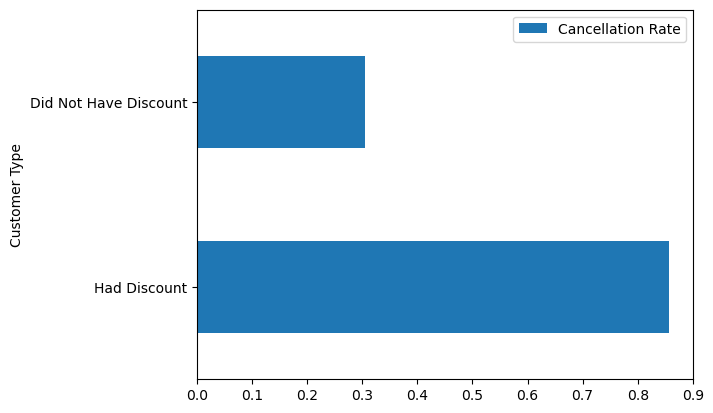

In [56]:
# Visualize the cancellation rate for those with a discount vs those without a discount
pd.DataFrame([['Had Discount', 0.8571428571428571],
             ['Did Not Have Discount', 0.30434782608695654]],
             columns=['Customer Type', 'Cancellation Rate']).plot.barh(x='Customer Type', y='Cancellation Rate', );

Better understand the customers' listening histories:
* Join together the listening history and audio tables
* How many listening sessions did each customer have in the past 3 months?
* What were the most popular genres that customers listened to?

In [57]:
# Split the ID in the audio data so the column can be joined with other tables
audio.head()

,ID,Name,Genre,Popularity,Audio Type
0,101,Dance All Night,Pop,1,Song
1,102,Unbreakable Beat,Pop,2,Song
2,103,Sunset Boulevard,Pop,5,Song
3,104,Glowing Hearts,Pop,10,Song
4,105,Pop Rocks,Pop,52,Song


In [60]:
# Hint: Check the data type of Audio ID in the audio table
audio['ID'] = pd.to_numeric(audio['ID'])

In [63]:
# The number of listening sessions that each customer had in the past 3 months
df = listening_data.merge(audio, how='left', left_on='Audio ID', right_on='ID')
df

,Customer ID,Session ID,Audio Order,Audio ID,Audio Type_x,ID,Name,Genre,Popularity,Audio Type_y
0,5001,100520,1,101,Song,101,Dance All Night,Pop,1,Song
1,5001,100520,2,102,Song,102,Unbreakable Beat,Pop,2,Song
2,5001,100520,3,103,Song,103,Sunset Boulevard,Pop,5,Song
3,5001,100520,4,104,Song,104,Glowing Hearts,Pop,10,Song
4,5001,100520,5,105,Song,105,Pop Rocks,Pop,52,Song
...,...,...,...,...,...,...,...,...,...,...
500,7579,111282,4,111,Song,111,Moonlit Serenade,Jazz,63,Song
501,6588,111286,1,201,Podcast,201,Jokes on Jokes,Comedy,2,Podcast
502,5763,111333,1,110,Song,110,Boss Moves,Hip Hop,28,Song
503,5763,111333,2,108,Song,108,Chase the Dream,Hip Hop,4,Song


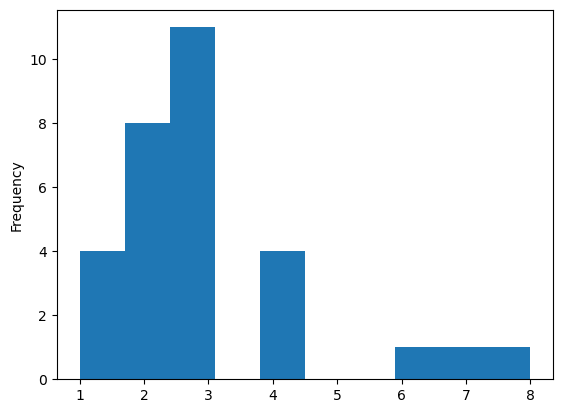

In [66]:

df.groupby('Customer ID')['Session ID'].nunique().plot.hist();

In [67]:
# The most popular genres that customers listened to
df.Genre.value_counts()

Pop           267
Hip Hop        88
Country        68
Jazz           48
Comedy         19
True Crime     15
Name: Genre, dtype: int64

## 5. Prep for Modeling

Create a DataFrame that is ready for modeling with each row representing a customer and the following numeric, non-null columns:
* Customer ID
* Whether a customer cancelled or not
* Whether a customer received a discount or not
* The number of listening sessions
* Percent of listening history consisting of Pop
* Percent of listening history consisting of Podcasts

In [93]:
# Create a dataframe ready for modeling
model_df = customer[['Customer ID', 'Cancelled', 'Discount?']]
model_df

,Customer ID,Cancelled,Discount?
0,5001,0,0
1,5002,0,0
2,5004,1,0
3,5267,0,0
4,5338,0,0
5,5404,1,0
6,5581,0,0
7,5759,1,0
8,5761,0,0
9,5763,0,0


In [89]:
# Calculate the number of listening sessions for each customer
number_listening_sessions = (df
                             .groupby('Customer ID')['Session ID']
                             .nunique()
                             .rename('No. of Sessions')
                             .to_frame()
                             .reset_index())
number_listening_sessions


,Customer ID,No. of Sessions
0,5001,8
1,5002,4
2,5004,1
3,5267,7
4,5338,4
5,5404,1
6,5581,3
7,5759,2
8,5761,3
9,5763,6


In [95]:
model_df = model_df.merge(number_listening_sessions, how='left', on='Customer ID')
model_df.head()

,Customer ID,Cancelled,Discount?,No. of Sessions
0,5001,0,0,8
1,5002,0,0,4
2,5004,1,0,1
3,5267,0,0,7
4,5338,0,0,4


In [96]:
pd.get_dummies(df['Genre'])

,Comedy,Country,Hip Hop,Jazz,Pop,True Crime
0,0,0,0,0,1,0
1,0,0,0,0,1,0
2,0,0,0,0,1,0
3,0,0,0,0,1,0
4,0,0,0,0,1,0
...,...,...,...,...,...,...
500,0,0,0,1,0,0
501,1,0,0,0,0,0
502,0,0,1,0,0,0
503,0,0,1,0,0,0


In [97]:
genres = (pd.concat([df['Customer ID'], pd.get_dummies(df['Genre'])], axis= 1)
 .groupby('Customer ID')
 .sum()
 .reset_index())
genres

,Customer ID,Comedy,Country,Hip Hop,Jazz,Pop,True Crime
0,5001,0,0,26,0,34,0
1,5002,0,22,0,0,0,0
2,5004,0,0,0,0,9,0
3,5267,0,0,22,0,23,0
4,5338,0,18,0,0,0,0
5,5404,0,0,0,0,8,0
6,5581,0,0,0,0,0,5
7,5759,0,0,0,0,15,0
8,5761,0,0,0,0,0,5
9,5763,0,0,11,0,20,0


In [98]:
total_audio = (listening_data
               .groupby('Customer ID')['Audio ID']
               .count()
               .to_frame()
               .reset_index())
total_audio.head()

,Customer ID,Audio ID
0,5001,60
1,5002,22
2,5004,9
3,5267,45
4,5338,18


In [99]:
# Percent pop
audio_df = genres.merge(total_audio, how='left', on='Customer ID')
audio_df

,Customer ID,Comedy,Country,Hip Hop,Jazz,Pop,True Crime,Audio ID
0,5001,0,0,26,0,34,0,60
1,5002,0,22,0,0,0,0,22
2,5004,0,0,0,0,9,0,9
3,5267,0,0,22,0,23,0,45
4,5338,0,18,0,0,0,0,18
5,5404,0,0,0,0,8,0,8
6,5581,0,0,0,0,0,5,5
7,5759,0,0,0,0,15,0,15
8,5761,0,0,0,0,0,5,5
9,5763,0,0,11,0,20,0,31


In [101]:

model_df['Pop Percentage'] = audio_df['Pop']/audio_df['Audio ID'] * 100
model_df.head()

,Customer ID,Cancelled,Discount?,No. of Sessions,Pop Percentage
0,5001,0,0,8,56.666667
1,5002,0,0,4,0.000000
2,5004,1,0,1,100.000000
3,5267,0,0,7,51.111111
4,5338,0,0,4,0.000000


In [105]:
# Percent podcasts
model_df['Podcast percentage'] = ((audio_df['Comedy'] + audio_df['True Crime']) / audio_df['Audio ID']) * 100
model_df.head()

,Customer ID,Cancelled,Discount?,No. of Sessions,Pop Percentage,Podcast percentage
0,5001,0,0,8,56.666667,0.0
1,5002,0,0,4,0.000000,0.0
2,5004,1,0,1,100.000000,0.0
3,5267,0,0,7,51.111111,0.0
4,5338,0,0,4,0.000000,0.0


Visualize the relationships in the modeling DataFrame using a pair plot:
* What are some of your observations?
* What variables might do a good job predicting customer cancellation?

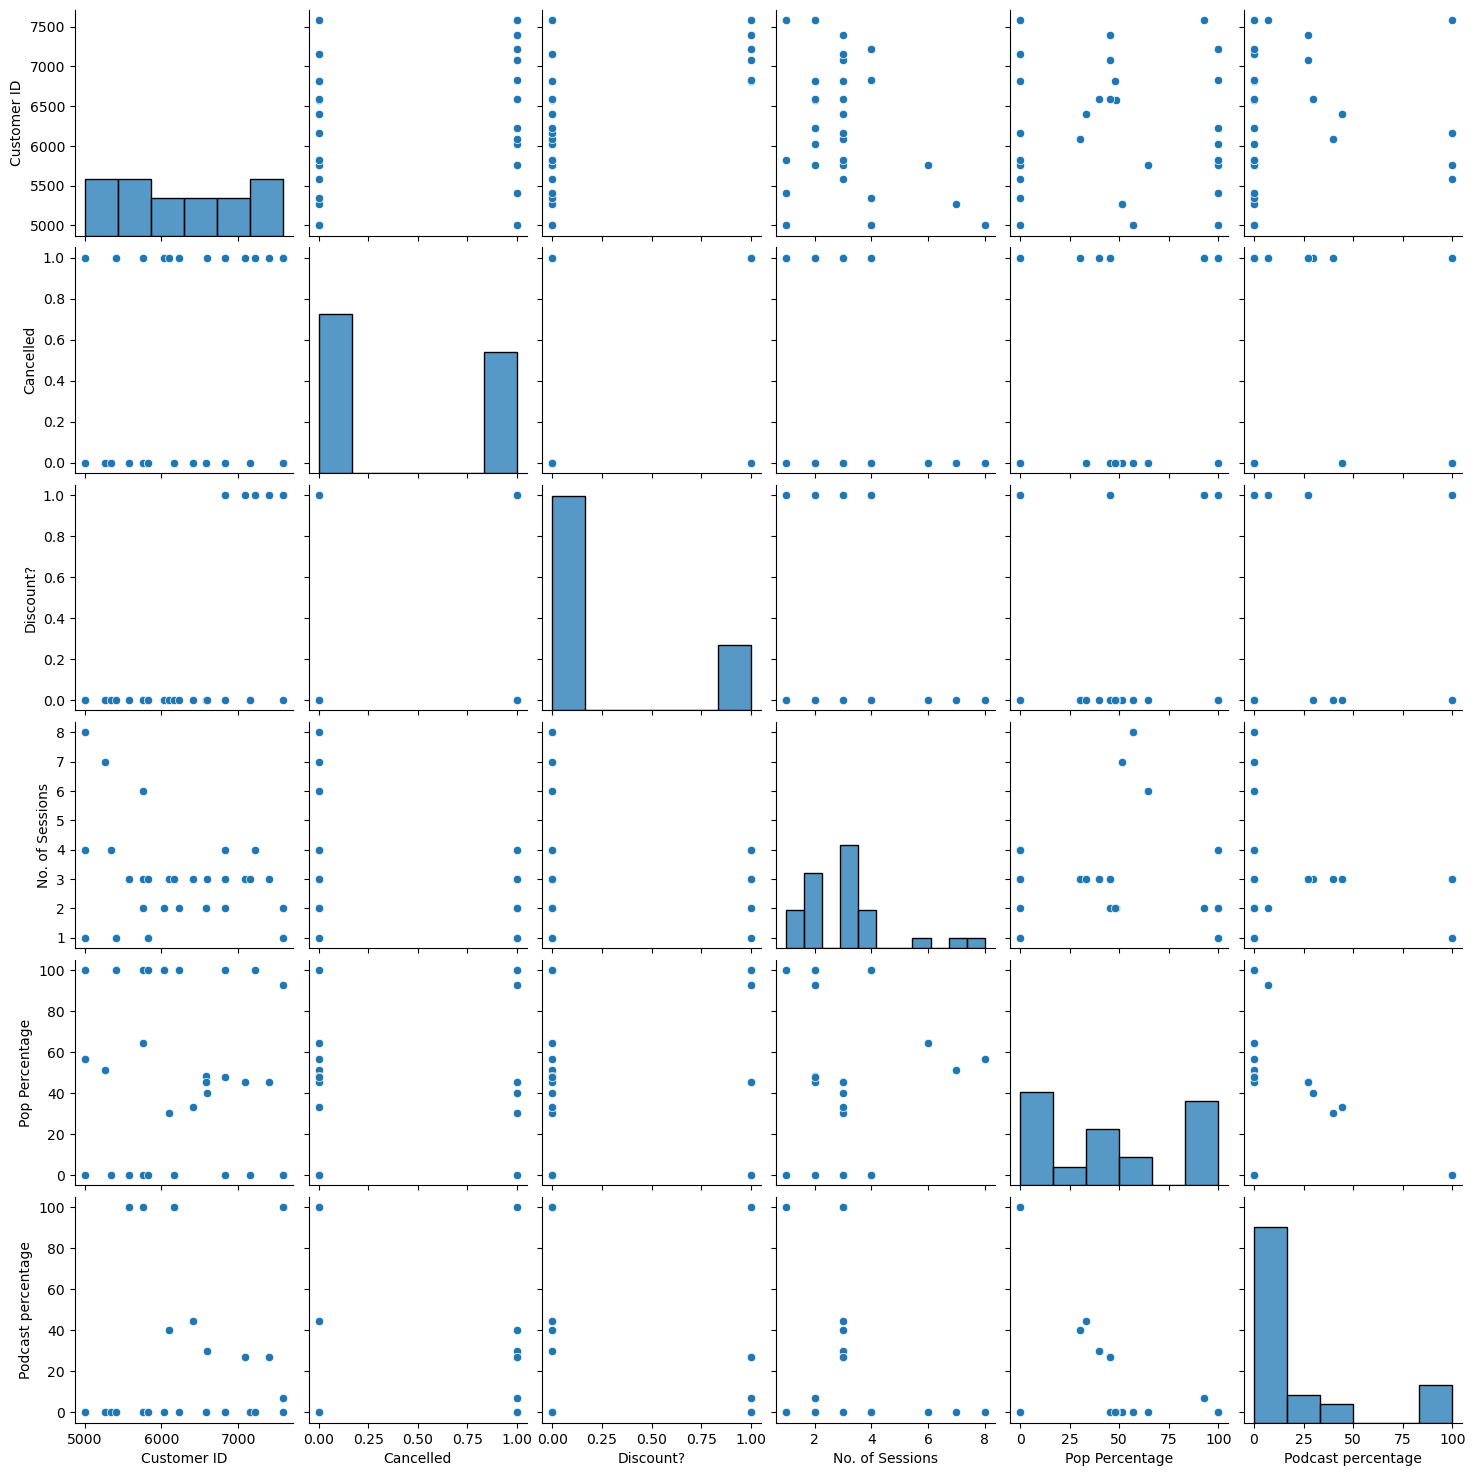

In [107]:
import seaborn as sns
sns.pairplot(model_df)

In [108]:
model_df.corr()

,Customer ID,Cancelled,Discount?,No. of Sessions,Pop Percentage,Podcast percentage
Customer ID,1.000000,0.269942,0.648514,-0.337083,-0.076129,0.083083
Cancelled,0.269942,1.000000,0.471825,-0.333739,0.585630,-0.035414
Discount?,0.648514,0.471825,1.000000,-0.048877,0.112675,0.062938
No. of Sessions,-0.337083,-0.333739,-0.048877,1.000000,-0.131156,-0.125459
Pop Percentage,-0.076129,0.585630,0.112675,-0.131156,1.000000,-0.487193
Podcast percentage,0.083083,-0.035414,0.062938,-0.125459,-0.487193,1.000000
